In this notebook, conclusions will be drawn based on the results of the ABC analysis of each city on the activity of sales and orders in the global supermarket

In [ ]:
#Description of the scales:
#category: The category of products sold in the superstore.
#city: The city where the order was placed.
#country: The country in which the superstore is located.
#customer_id: A unique identifier for each customer.
#customer_name: The name of the customer who placed the order.
#discount: The discount applied to the order.
#market: The market or region where the superstore operates.
#ji_lu_shu: An unknown or unspecified column.
#order_date: The date when the order was placed.
#order_id: A unique identifier for each order.
#order_priority: The priority level of the order.
#product_id: A unique identifier for each product.
#product_name: The name of the product.
#profit: The profit generated from the order.
#quantity: The quantity of products ordered.
#region: The region where the order was placed.
#row_id: A unique identifier for each row in the dataset.
#sales: The total sales amount for the order.
#segment: The customer segment (e.g., consumer, corporate, or home office).
#ship_date: The date when the order was shipped.
#ship_mode: The shipping mode used for the order.
#shipping_cost: The cost of shipping for the order.
#state: The state or region within the country.
#sub_category: The sub-category of products within the main category.
#year: The year in which the order was placed.
#market2: Another column related to market information.
#weeknum: The week number when the order was placed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv('/superstore.csv')
data1.head(10)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
5,Office Supplies,Los Angeles,United States,JF-154904,Jeremy Farry,0.0,US,1,2011-10-19 00:00:00.000,CA-2011-117317,...,13,Consumer,2011-10-19 00:00:00.000,Same Day,2.39,California,Paper,2011,North America,43
6,Office Supplies,Los Angeles,United States,WB-218504,William Brown,0.0,US,1,2011-11-04 00:00:00.000,CA-2011-125829,...,19,Consumer,2011-11-11 00:00:00.000,Standard Class,1.15,California,Paper,2011,North America,45
7,Office Supplies,Los Angeles,United States,JA-159704,Joseph Airdo,0.0,US,1,2011-11-12 00:00:00.000,CA-2011-151295,...,12,Consumer,2011-11-16 00:00:00.000,Standard Class,0.92,California,Paper,2011,North America,46
8,Office Supplies,Los Angeles,United States,SP-209204,Susan Pistek,0.0,US,1,2011-11-22 00:00:00.000,CA-2011-135090,...,54,Consumer,2011-11-26 00:00:00.000,Standard Class,6.98,California,Paper,2011,North America,48
9,Office Supplies,Los Angeles,United States,RL-196154,Rob Lucas,0.0,US,1,2011-12-05 00:00:00.000,CA-2011-133830,...,49,Consumer,2011-12-10 00:00:00.000,Standard Class,1.99,California,Paper,2011,North America,50


In [4]:
data = data1.drop('Customer.Name', axis=1).drop('Discount', axis=1).drop('记录数', axis=1).drop('Order.Date', axis=1).drop('Customer.ID', axis=1).drop('Product.Name', axis=1).drop('Region', axis=1).drop('Segment', axis=1).drop('Ship.Date', axis=1).drop('State', axis=1).drop('Sub.Category', axis=1).drop('Year', axis=1).drop('Market2', axis=1).drop('weeknum', axis=1).drop('Product.ID', axis=1).drop('Order.ID', axis=1).drop('Order.Priority', axis=1)
data.head(10)

,Category,City,Country,Market,Profit,Quantity,Row.ID,Sales,Ship.Mode,Shipping.Cost
0,Office Supplies,Los Angeles,United States,US,9.3312,3,36624,19,Second Class,4.37
1,Office Supplies,Los Angeles,United States,US,9.2928,2,37033,19,Standard Class,0.94
2,Office Supplies,Los Angeles,United States,US,9.8418,3,31468,21,Standard Class,1.81
3,Office Supplies,Los Angeles,United States,US,53.2608,2,31469,111,Standard Class,4.59
4,Office Supplies,Los Angeles,United States,US,3.1104,1,32440,6,Standard Class,1.32
5,Office Supplies,Los Angeles,United States,US,6.5856,3,32890,13,Same Day,2.39
6,Office Supplies,Los Angeles,United States,US,9.3312,3,35608,19,Standard Class,1.15
7,Office Supplies,Los Angeles,United States,US,5.8604,2,33709,12,Standard Class,0.92
8,Office Supplies,Los Angeles,United States,US,24.2190,9,35267,54,Standard Class,6.98
9,Office Supplies,Los Angeles,United States,US,23.0864,4,38866,49,Standard Class,1.99


In [5]:
#the number in the middle and on the border
city_counts = data['City'].value_counts()
middle_city_counts1 = len(city_counts) // 2
middle_city_counts = city_counts[middle_city_counts1]
print(city_counts.head(1), '\n',
      middle_city_counts, '\n',
      city_counts.tail(1))

City
New York City    915
Name: count, dtype: int64 
 6 
 City
Redwood City    1
Name: count, dtype: int64


In [6]:
#evaluations
mean_profit = np.mean(data['Profit'])
min_profit = np.min(data['Profit'])
max_profit = np.max(data['Profit'])

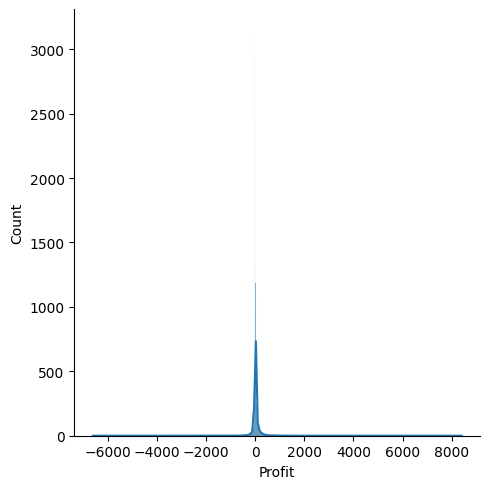

In [7]:
sns.displot(data=data['Profit'], kde=True)

In [76]:
#the score of the 80% best indicators for "profit"
percent_80 = 0.8
range_value = max_profit - min_profit
delta_80 = percent_80 * range_value
value_80 = mean_profit + delta_80 / 2

top80 = data[data['Profit'] >= value_80]
print('mean: ', np.mean(top80['Profit']))
top80.head()

mean:  7559.9784


,Category,City,Country,Market,Profit,Quantity,Row.ID,Sales,Ship.Mode,Shipping.Cost
27727,Technology,Lafayette,United States,US,8399.9760,5,38123,17500,Standard Class,349.07000
28327,Technology,Seattle,United States,US,6719.9808,4,39450,14000,First Class,20.00054


In [47]:
#evaluation of the top 15% indicators for "profit"
percent_15 = 0.15
range_value = max_profit - min_profit
delta_15 = percent_15 * range_value
value_15 = mean_profit + delta_15 / 2

top15 = data[data['Profit'] >= value_15]
print('mean: ', np.mean(top15['Profit']))
top15.head()

mean:  1909.4530393939397


,Category,City,Country,Market,Profit,Quantity,Row.ID,Sales,Ship.Mode,Shipping.Cost
1757,Office Supplies,Columbia,United States,US,1270.9900,2,38577,2542,Standard Class,91.36
2143,Office Supplies,Atlanta,United States,US,3177.4750,5,31806,6355,Standard Class,581.12
2204,Office Supplies,Roswell,United States,US,1264.7559,3,34145,2691,Standard Class,244.88
2483,Office Supplies,Virginia Beach,United States,US,1276.4871,7,32291,2716,Standard Class,378.83
2722,Office Supplies,Minneapolis,United States,US,4630.4755,5,35395,9450,Standard Class,655.61


In [75]:
#evaluation of 5% of the best indicators for "profit"
percent_5 = 0.05
range_value = max_profit - min_profit
delta_5 = percent_5 * range_value
value_5 = mean_profit + delta_5 / 2

top5 = data[data['Profit'] >= value_5]
print('mean: ', np.mean(top5['Profit']))
top5.head()

mean:  764.3222954736841


,Category,City,Country,Market,Profit,Quantity,Row.ID,Sales,Ship.Mode,Shipping.Cost
221,Office Supplies,Los Angeles,United States,US,429.5772,4,33773,1101,First Class,364.76
301,Office Supplies,Los Angeles,United States,US,459.3960,5,36731,1641,Standard Class,99.85
391,Office Supplies,San Francisco,United States,US,419.8185,5,34052,1448,Standard Class,114.80
503,Office Supplies,San Francisco,United States,US,510.6360,14,33008,1702,Standard Class,107.69
777,Office Supplies,Torrance,United States,US,459.3960,5,38135,1641,Standard Class,77.66


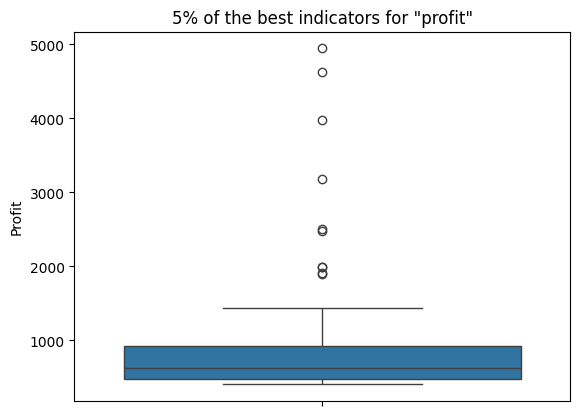

In [43]:
sns.boxplot(top5['Profit'].head(100))
plt.title('5% of the best indicators for "profit"')
plt.show()

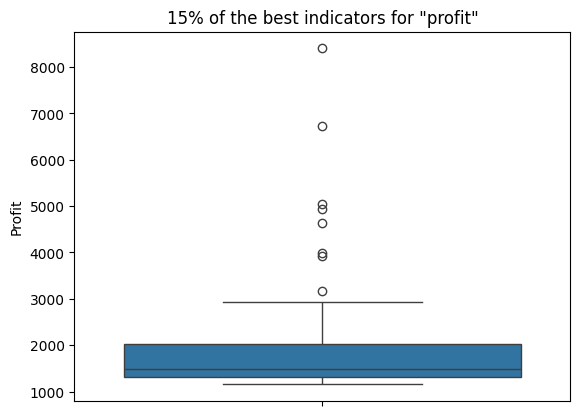

In [44]:
sns.boxplot(top15['Profit'].head(100))
plt.title('15% of the best indicators for "profit"')
plt.show()

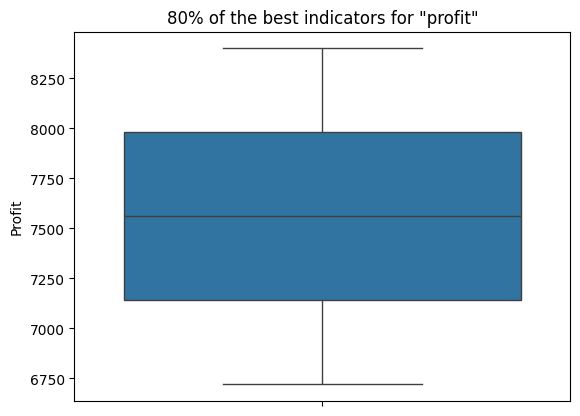

In [45]:
sns.boxplot(top80['Profit'].head(100))
plt.title('80% of the best indicators for "profit"')
plt.show()

In [93]:
#recent defining tables
top5_city = top5.drop('Category', axis=1).drop('Market', axis=1).drop('Quantity', axis=1).drop('Row.ID', axis=1).drop('Sales', axis=1).drop('Ship.Mode', axis=1).drop('Shipping.Cost', axis=1)
top5_city_mean = np.mean(top5_city['Profit'])
top5_city_q = np.quantile(top5_city['Profit'], 0.05)
top5_city[top5_city['Profit'] < top5_city_q].head()

,City,Country,Profit
801,Westminster,United States,412.4680
1814,Burlington,United States,406.7154
2678,Columbus,United States,411.7365
3453,Turin,Italy,413.8800
4460,South Shields,United Kingdom,409.1400


In [92]:
top15_city = top15.drop('Category', axis=1).drop('Market', axis=1).drop('Quantity', axis=1).drop('Row.ID', axis=1).drop('Sales', axis=1).drop('Ship.Mode', axis=1).drop('Shipping.Cost', axis=1)
top15_city_mean = np.mean(top15_city['Profit'])
top15_city_q = np.quantile(top15_city['Profit'], 0.05)
top15_city[top15_city['Profit'] < top15_city_q].head()

,City,Country,Profit
20442,Tiruppur,India,1155.3600
25926,Montréal,Canada,1159.0200
28434,New York City,United States,1159.9855
43370,Puteaux,France,1163.8830
44235,Geraldton,Australia,1164.2670


In [91]:
top80_city = top80.drop('Category', axis=1).drop('Market', axis=1).drop('Quantity', axis=1).drop('Row.ID', axis=1).drop('Sales', axis=1).drop('Ship.Mode', axis=1).drop('Shipping.Cost', axis=1)
top80_city_mean = np.mean(top80_city['Profit'])
top80_city_q = np.quantile(top80_city['Profit'], 0.05)
top80_city[top80_city['Profit'] < top80_city_q].head()

,City,Country,Profit
28327,Seattle,United States,6719.9808


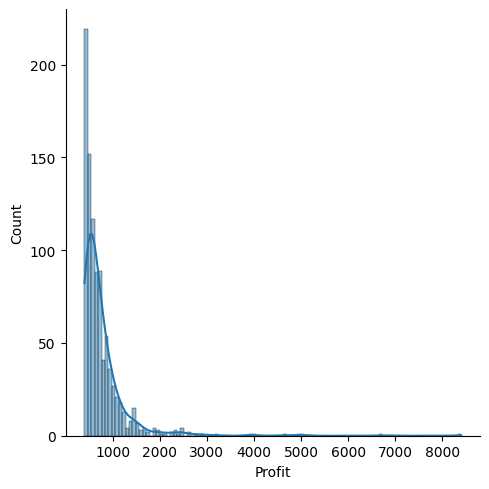

In [103]:
sns.displot(data=top5['Profit'], kde=True)

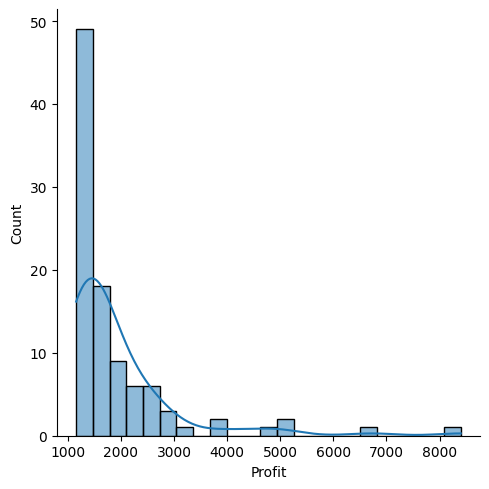

In [104]:
sns.displot(data=top15['Profit'], kde=True)

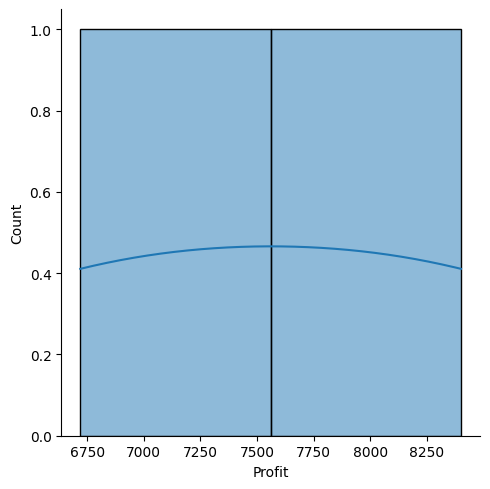

In [105]:
sns.displot(data=top80['Profit'], kde=True)

In [109]:
city_counts_top5 = top15['City'].value_counts()
middle_city_counts1_top5 = len(city_counts_top5) // 2
middle_city_counts_top5 = city_counts_top5[middle_city_counts1_top5]
print(city_counts_top5.head(1), '\n',
      middle_city_counts_top5, '\n',
      city_counts_top5.tail(1))

City
New York City    10
Name: count, dtype: int64 
 1 
 City
Sacramento    1
Name: count, dtype: int64


#conclusion
As a result, we found a number of cities that could be classified into categories "A", "B" and "C".
Cities from category "C" can be lowered in the budget, or the distribution of the store can be withdrawn from there altogether. In cities of category "A", on the contrary, the budget (for example, for delivery) can be raised